In [1]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
import scipy
import utils_dagma
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score
from copy import deepcopy

In [17]:
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v11/v100_600_normX_sym1/'
with open(path + f'X/X_1.pkl', 'rb') as f:
    true_data = pickle.load(f)
X = true_data['X']
W_true = true_data['W_true']
B_true = (W_true != 0)

W_list = []
name_list = []

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_l1.pkl'
with open(path, 'rb') as f:
    W_dagma_no_l1 = pickle.load(f)
    W_list.append(W_dagma_no_l1)
    name_list.append("dagma w/o l1")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_l2.pkl'
with open(path, 'rb') as f:
    W_dagma_no_l2 = pickle.load(f)
    W_list.append(W_dagma_no_l2)
    name_list.append("dagma w/o l2")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_l1+l2.pkl'
with open(path, 'rb') as f:
    W_dagma_no_l1_l2 = pickle.load(f)
    W_list.append(W_dagma_no_l1_l2)
    name_list.append("dagma w/o l1+l2")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_dag.pkl'
with open(path, 'rb') as f:
    W_dagma_no_dag = pickle.load(f)
    W_list.append(W_dagma_no_dag)
    name_list.append("dagma w/o dag")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_dag+l1+l2.pkl'
with open(path, 'rb') as f:
    W_dagma_no_dag = pickle.load(f)
    W_list.append(W_dagma_no_dag)
    name_list.append("dagma w/o dag+l1+l2")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v39/100_600/W_100_600_1_0_normX_sym1_disable_none.pkl'
with open(path, 'rb') as f:
    W_dagma = pickle.load(f)
    W_list.append(W_dagma)
    name_list.append("dagma")


path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX=sym1_L1.pkl'
with open(path, 'rb') as f:
    W_OLS_w_l1 = pickle.load(f)
    W_list.append(W_OLS_w_l1)
    name_list.append("OLS with l1")

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX=sym1_L2.pkl'
with open(path, 'rb') as f:
    W_OLS_w_l2 = pickle.load(f)
    W_list.append(W_OLS_w_l2)
    name_list.append("OLS with l2")


path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX=sym1_L1+L2.pkl'
with open(path, 'rb') as f:
    W_OLS_w_l1_l2 = pickle.load(f)
    W_list.append(W_OLS_w_l1_l2)
    name_list.append("OLS with l1+l2")


path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v48/100_600/W_100_600_1_0_normX=sym1_OLS.pkl'
with open(path, 'rb') as f:
    W_OLS = pickle.load(f)
    W_list.append(W_OLS)
    name_list.append("OLS")

/opt/anaconda3/envs/knockoff/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/knockoff/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/knockoff/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/knockoff/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/knockoff/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/

Text(0.5, 1.0, '100 * 600 | seed_X = 1 | AUPR of 100 tasks')

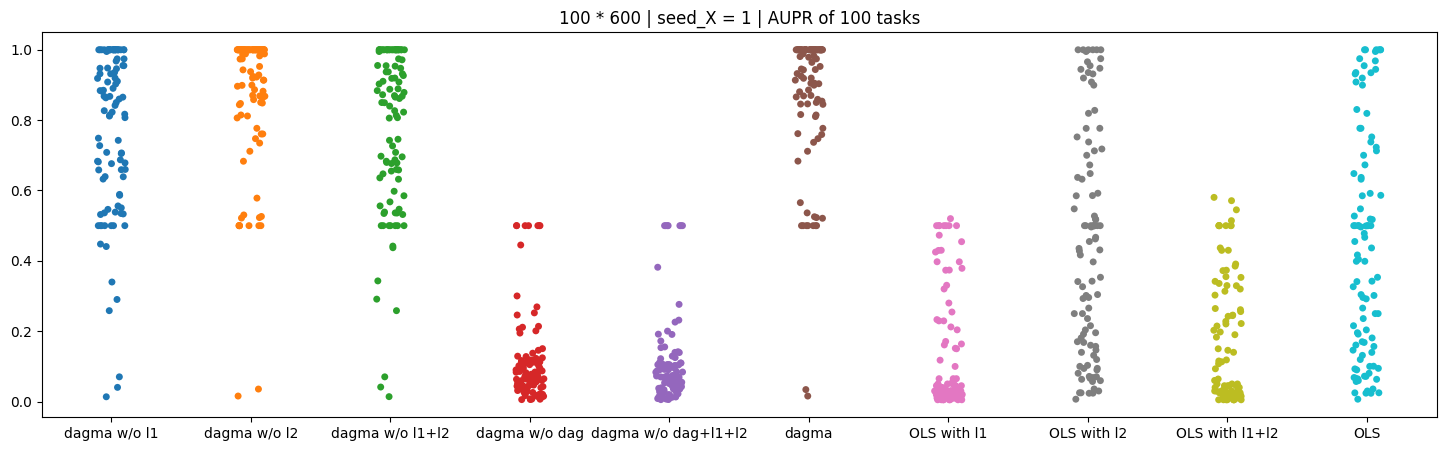

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(18, 5))
data = {}
i, j = 0, 0
for W, name in zip(W_list, name_list):
    auprs = []
    for col in range(100):
        W_col = W[:, col]
        true_col = B_true[:, col]
        
        prec, rec, threshold = precision_recall_curve(true_col, np.abs(W_col))
        aupr =  auc(rec, prec)
        auprs.append(aupr)
    
    data[name] = auprs
sns.stripplot(data)
plt.title("100 * 600 | seed_X = 1 | AUPR of 100 tasks")

In [30]:
path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v47/v100_600_option_16_normX=sym1/W/W_1_1_0.pkl'
with open(path, 'rb') as f:
    W = pickle.load(f)['W_est']
Z_perm = np.abs(W[:100, :100]) - np.abs(W[100:, :100])

path = '/Users/jiahang/Documents/dagma/src/dagma/simulated_data/v47/v100_600_normX_sym1_option_10_PLS_topo_sort/W/W_1_1_0.pkl'
with open(path, 'rb') as f:
    W = pickle.load(f)['W_est']
Z_orig = np.abs(W[:100, :100]) - np.abs(W[100:, :100])

Text(0.5, 1.0, '100 * 600 | seed_X=1\n permutation fdr=0.6987 | power=0.8717\n original fdr=0.2174 | power=0.8700')

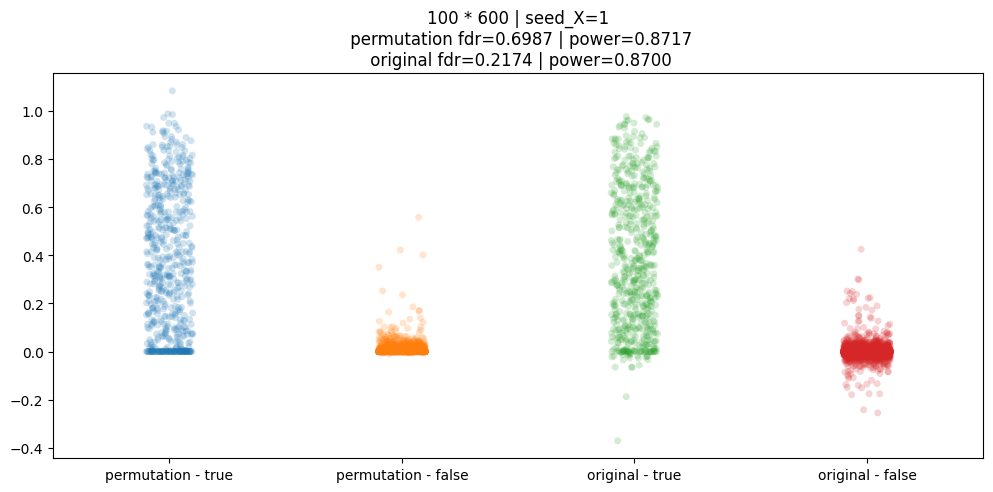

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
data = {
    "permutation - true": Z_perm[B_true].flatten(),
    "permutation - false": Z_perm[~B_true].flatten(),
    "original - true": Z_orig[B_true].flatten(),
    "original - false": Z_orig[~B_true].flatten(),
}
sns.stripplot(data, alpha=0.2, ax=ax)
ax.set_title("100 * 600 | seed_X=1\n permutation fdr=0.6987 | power=0.8717\n original fdr=0.2174 | power=0.8700")